**Importing Libraries**

In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


**Importing Data**

In [500]:
df =pd.read_csv('train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Data Dimensions**

In [501]:
df.shape

(1460, 81)

In [502]:
#Drop the Id column
df.drop(['Id'], axis=1, inplace=True)


**Handling outlier**

<AxesSubplot:xlabel='SalePrice'>

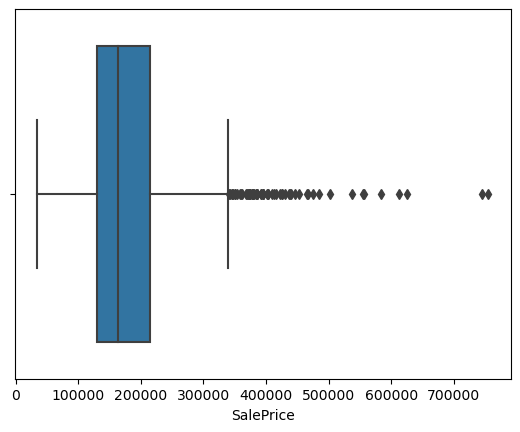

In [503]:
sns.boxplot(df['SalePrice'])

If outlier removal is done using the interquartile method then most of the high priced house related data would be removed.
This will affect the predictability of the model being built for cases where the price of house is high. So outliers will not be removed

In [504]:
df.shape

(1460, 80)

**Handling the numeric data**

In [505]:
#Get the numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [506]:
# correlation matrix
cor = df_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


The correlation between two variables is considered to be very weak if the absolute value of r is < 0.2.So we can discard those dependent variables whose correlation coefficient with the target variable is less than absolute value of 0.2

In [507]:
weak_cor = cor[abs(cor['SalePrice']) < 0.2]
print(weak_cor['SalePrice'])

MSSubClass      -0.084284
OverallCond     -0.077856
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
BsmtHalfBath    -0.016844
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64


In [508]:
df_numeric.drop(weak_cor.index.values, axis=1, inplace=True)
df_numeric.shape

(1460, 23)

In [509]:
df_numeric.isnull().sum()

LotFrontage     259
LotArea           0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

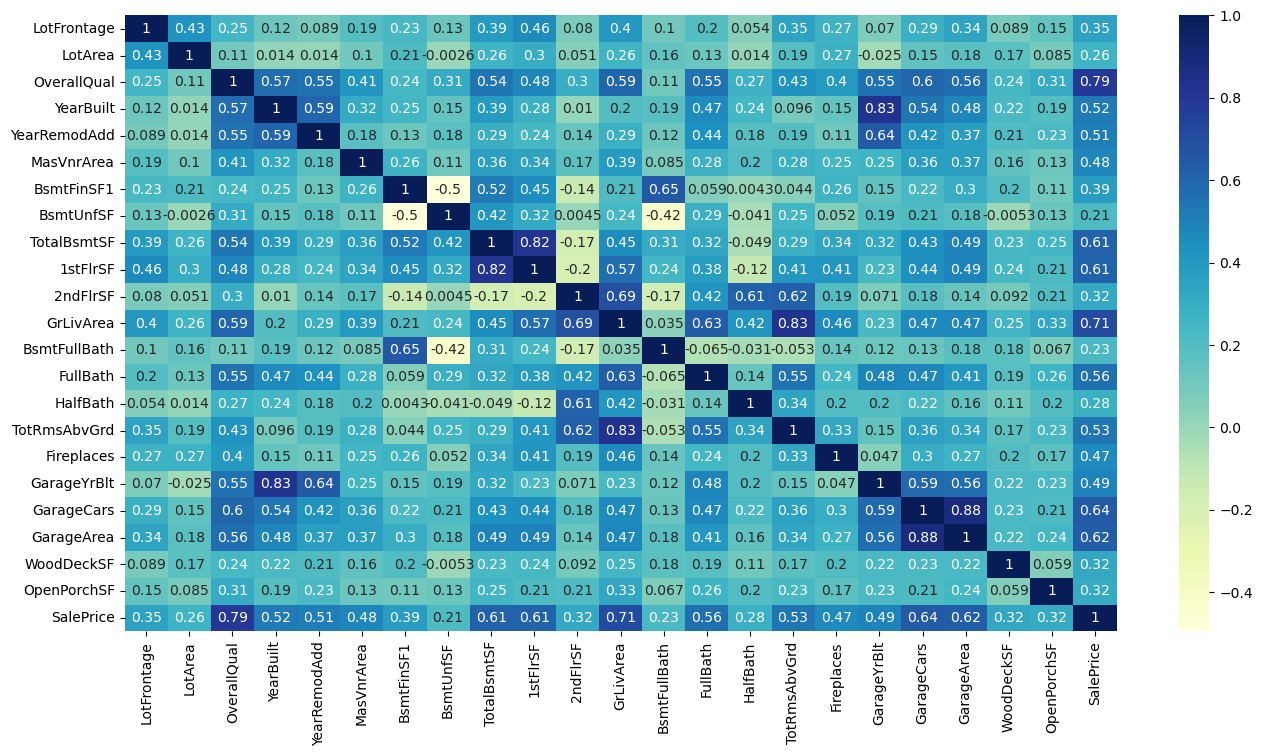

In [510]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()

The numeric columns having null values are 'LotFrontage', 'MasVnrArea', and 'GarageYrBlt'. 'GarageYrBlt' is highly correlated with 'YearBuilt' indicating collinearity. Since all of them have a corelation of less than 0.5 with 'SalePrice' dropping them.

In [511]:
df_numeric.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],axis=1, inplace=True)
df_numeric.shape

(1460, 20)

The following pairs of dependent variables are highly correlated indicating presence of collinearity. So dropping one of each.
1stFlrSF and TotalBsmtSF 
TotRmsAbvGrd and GrLivArea         
GarageArea and GarageCars

In [512]:
df_numeric.drop(['1stFlrSF','TotRmsAbvGrd','GarageCars' ],axis=1, inplace=True)
df_numeric.shape

(1460, 17)

## Categorical Data

In [513]:
df_objs = df.select_dtypes(include='object')
df_objs.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [514]:
df_objs.shape

(1460, 43)

In [515]:
df_objs.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

Since 'Alley','FireplaceQu', PoolQC', 'Fence' 'MiscFeature' have more than 50% nulls, dropping these features

In [516]:
df_objs.drop(['Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [517]:
df_objs.shape

(1460, 38)

Filling 'None ' for 'basement' and 'garage' related variables.

In [518]:
bsmt_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_objs[bsmt_cols] = df_objs[bsmt_cols].fillna('None')

In [519]:
gar_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_objs[gar_cols] = df_objs[gar_cols].fillna('None')

In [520]:
df_objs["MasVnrType"] = df_objs["MasVnrType"].fillna("None")

In [521]:
df_objs['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Fill the missing data for 'Electrical' using the mode value

In [522]:
df_objs['Electrical'] = df_objs['Electrical'].fillna('SBrkr')


In [523]:
df_objs.shape

(1460, 38)

Ensuring there are no more NaN in data

In [524]:
df_objs.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [525]:
df_objs.shape

(1460, 38)

Get dummy variables

In [526]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [527]:
df_objs.shape

(1460, 205)

In [528]:
final_df = pd.concat([df_objs,df_numeric],axis=1)

In [529]:
final_df.shape

(1460, 222)

In [530]:
final_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,854,1710,1,2,1,0,548,0,61,208500
1,0,0,1,0,1,0,0,1,0,0,...,0,1262,0,2,0,1,460,298,0,181500
2,0,0,1,0,1,0,0,0,0,0,...,866,1786,1,2,1,1,608,0,42,223500
3,0,0,1,0,1,0,0,0,0,0,...,756,1717,1,1,0,1,642,0,35,140000
4,0,0,1,0,1,0,0,0,0,0,...,1053,2198,1,2,1,1,836,192,84,250000


In [531]:

final_df.shape

(1460, 222)

## Train Test Split

In [532]:
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [533]:
y.shape

(1460,)

In [534]:
X.shape

(1460, 221)

In [535]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [536]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [537]:
X_train = scaler_x.fit_transform(X_train)
#y_train = scaler_y.fit_transform(y_train)

In [538]:
X_test = scaler_x.transform(X_test)
#y_test = scaler_y.transform(y_test)

In [539]:
X_test.shape

(438, 221)

## Regularization

In [540]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation folds
folds = 5

## Ridge Regression

In [541]:
ridge = Ridge()

# cross validation

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [542]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


{'alpha': 0.05}


In [543]:
#Fitting Ridge model for alpha = 0.05 and printing coefficients which have been penalised

alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.29730361e+04  3.32914372e+04  3.57779740e+04  3.30564207e+04
  1.49392788e+04  1.18397308e+01 -1.58044128e+04  9.71559836e+02
  9.86483018e+03  2.79848394e+03  1.16180551e+04  3.81623219e+03
  1.10293046e+04 -9.43482190e+03 -3.94529286e+03 -1.07200173e+03
  4.71360531e+03 -1.02195775e+04  6.47951532e+03  7.14894333e+03
  7.85469881e+03 -4.56554146e+03 -7.59189714e+02  3.06412581e+04
 -8.49817900e+03  1.63810540e+03  4.82316013e+03 -5.11798270e+03
 -1.20726050e+04 -2.99943076e+03  1.45208210e+04 -1.68989178e+03
  4.25436516e+04  2.36941842e+04  2.61976263e+03  9.98223976e+03
 -4.47948536e+02  4.36254028e+03  1.91816223e+04  3.05248361e+04
 -4.49147547e+03  1.84937497e+04 -5.06608970e+02  1.41709689e+04
  2.05200630e+04  5.86481571e+03 -1.16573814e+04  8.42487507e+03
  7.63865504e+03  6.16336405e+02  1.35175100e+04  1.33786407e+04
  5.12718064e+04 -3.47355915e+05 -6.65919239e+04  8.95402865e+03
  3.13365931e+04 -2.33892911e+04 -2.62475744e+04 -2.02274659e+04
 -1.70503328e+04  2.51555

In [544]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.936193458318183
0.8377065166332005
407130323907.9535
457458675160.199
398756438.6953511
1044426198.9958881


Ridge regression gives r2 score of 93.6% on training data and 83.7% on test data

In [545]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [546]:
mean_absolute_error(y_test,y_pred_test)

19107.337799027628

In [547]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

32317.583433726726

In [549]:
def get_indices_topn(arr,n):
    #get absolute values
    arr_abs = np.fabs(arr)
    indices = np.argpartition(arr_abs,n)[-n:]
    
    #print(indices)
    return indices

In [550]:
indices = get_indices_topn(ridge.coef_, 5)
print(indices)

[  2 217 218 219   0]


In [551]:
#Get column names for these indices
dftemp = final_df.columns[indices]
dftemp

Index(['MSZoning_RL', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'MSZoning_FV'], dtype='object')

If we choose double value for alpha then alpha = 0.1 and run ridge regression again

In [552]:
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=0.1)

In [553]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9299742356005428
0.8417648156675843
446813310836.0802
446019496820.0725
437623223.1499316
1018309353.4704852


Ridge regression gives r2 score of 92.9% on training data and 84.1% on test data

In [554]:
indices = get_indices_topn(ridge.coef_, 5)
print(indices)

[  2 217 218 219   0]


In [555]:
#Get column names for these indices
dftemp = final_df.columns[indices]
dftemp

Index(['MSZoning_RL', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'MSZoning_FV'], dtype='object')

## Lasso

In [556]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [557]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [559]:
#Fitting Lasso model for alpha = 0.0001
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=20)

In [560]:
lasso.coef_

array([ 1.35473041e+04,  1.42342358e+04,  1.81018167e+04,  1.51942603e+04,
        5.46125361e+03,  0.00000000e+00, -1.17599467e+04,  4.74127127e+02,
        8.52307804e+03,  3.65896143e+03,  9.85897087e+03,  0.00000000e+00,
        1.18538494e+04, -8.36169185e+03, -0.00000000e+00, -2.60546056e+02,
        1.88773825e+03,  0.00000000e+00,  0.00000000e+00,  1.34852947e+02,
        5.38558590e+03,  7.79863458e+02, -6.90937926e+02,  2.76435049e+04,
       -9.07482434e+03, -0.00000000e+00, -0.00000000e+00, -4.64994033e+03,
       -1.15861892e+04, -4.06714825e+03,  1.07323211e+04, -7.63198048e+02,
        4.31105075e+04,  2.37036858e+04, -1.05816164e+03,  5.05952412e+03,
       -1.21465472e+03,  3.00234642e+03,  1.97315752e+04,  2.62153485e+04,
       -4.35992243e+03,  1.45875994e+04, -2.33772071e+03,  1.12716679e+04,
        1.13620053e+04,  1.00373027e+03, -1.27100247e+04,  4.82873728e+03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.85583536e+04, -

In [561]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.932018785143505
0.8432523684921078
433767656021.8305
441826513034.0304
424845892.28386927
1008736331.1279233


Lasso regression gives r2 score of 90.4% on training data and 85.7% on test data

In [562]:
indices = get_indices_topn(lasso.coef_, 5)
print(indices)

[  2 217 218 219   0]


In [563]:
#Get column names for these indices
dftemp = final_df.columns[indices]
dftemp

Index(['MSZoning_RL', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'MSZoning_FV'], dtype='object')

 If we choose double value for alpha then alpha = 40 and run lasso regression again

In [564]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =40

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=40)

In [565]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9088301111725713
0.8466103629205243
581727600189.632
432361292061.80615
569762585.8860254
987126237.5840323



Lasso regression gives r2 score of 89.1% on training data and 86.0% on test data

In [566]:
indices = get_indices_topn(lasso.coef_, 5)
print(indices)

[216 217 218 219 110]


In [567]:
#Get column names for these indices
dftemp = final_df.columns[indices]
dftemp

Index(['HalfBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'MasVnrType_None'],
      dtype='object')

#Remove the 5 most important variables and run lasso

In [568]:
final_df_new = final_df.drop(dftemp, axis=1)


X = final_df_new.drop('SalePrice',axis=1)
y = df['SalePrice']

In [569]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [570]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [571]:
X_train = scaler_x.fit_transform(X_train)
#y_train = scaler_y.fit_transform(y_train)

In [572]:
X_test = scaler_x.transform(X_test)
#y_test = scaler_y.transform(y_test)

In [573]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [574]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [575]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=20)

In [576]:
lasso.coef_

array([ 1.10592239e+04,  1.30291482e+04,  1.72341227e+04,  1.30963012e+04,
        3.05123650e+03,  0.00000000e+00, -1.31713573e+04,  2.44879654e+02,
        9.87811463e+03,  5.58882520e+03,  1.02887992e+04,  0.00000000e+00,
        1.11693078e+04, -8.86460015e+03, -0.00000000e+00, -3.98999242e+02,
        1.99391003e+03,  0.00000000e+00,  0.00000000e+00,  2.10319039e+02,
        4.52282690e+03,  1.58190410e+02, -1.18310697e+03,  2.64608611e+04,
       -1.08993498e+04, -5.39702464e+02, -0.00000000e+00, -3.33497452e+03,
       -1.09016539e+04, -4.89488401e+03,  1.28027394e+04, -6.90960172e+02,
        4.35118924e+04,  2.54262803e+04, -5.29913867e+02,  1.84618590e+03,
       -1.78169412e+03,  2.29918154e+03,  2.17170614e+04,  2.60211076e+04,
       -5.26270485e+03,  1.56161928e+04, -2.50275529e+03,  1.07037105e+04,
        1.11981443e+04,  1.57939016e+03, -1.36072130e+04,  3.73455532e+03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.19265633e+04, -

In [577]:
indices = get_indices_topn(lasso.coef_, 5)
print(indices)

[211 212 213 214   0]


In [578]:
#Get column names for these indices
dftemp = final_df_new.columns[indices]
dftemp

Index(['2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'MSZoning_FV'], dtype='object')

In [579]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9310386165173857
0.8363912518560401
440021816797.7948
461166028468.3093
430971417.03995574
1052890475.9550442
